# Animal Shelter Outcomes - Eric Liao

#### For my final project, I will be looking at data from a Kaggle competition on Animal Shelter Outcomes.  The "Outcomes" column has been removed from the test set, and I will create a model (from my train set) to see how accurately I can predict the missing outcomes.  In order to complete this task, I will have to be picky on what categories I build my model out of, and see what yields the best results.

## Hypothesis

#### I believe that "age" will play the most important role in correctly predicting the outcome of an animal shelter.  Since most adopters prefer a younger puppy instead of an elder dog, age should be important in predicting adoptions and deaths.

## Exploratory Analysis

In [107]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import feature_selection, linear_model, svm, datasets
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import socket, struct
import matplotlib.pyplot as plt
from sklearn import tree, ensemble, metrics, cross_validation, externals, grid_search, neighbors, linear_model

import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

%matplotlib inline
plt.style.use('ggplot')

In [108]:
train_df = pd.read_csv(os.path.join('train 2.csv'), index_col = 'AnimalID')

In [109]:
test_df = pd.read_csv(os.path.join('test.csv'), index_col = 'ID')

In [110]:
train_df.columns

Index([u'Name', u'DateTime', u'OutcomeType', u'OutcomeSubtype', u'AnimalType',
       u'SexuponOutcome', u'AgeuponOutcome', u'Breed', u'Color'],
      dtype='object')

In [111]:
test_df.columns

Index([u'Name', u'DateTime', u'AnimalType', u'SexuponOutcome',
       u'AgeuponOutcome', u'Breed', u'Color'],
      dtype='object')

In [112]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26729 entries, A671945 to A706629
Data columns (total 9 columns):
Name              19038 non-null object
DateTime          26729 non-null object
OutcomeType       26729 non-null object
OutcomeSubtype    13117 non-null object
AnimalType        26729 non-null object
SexuponOutcome    26728 non-null object
AgeuponOutcome    26711 non-null object
Breed             26729 non-null object
Color             26729 non-null object
dtypes: object(9)
memory usage: 2.0+ MB


In [113]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11456 entries, 1 to 11456
Data columns (total 7 columns):
Name              8231 non-null object
DateTime          11456 non-null object
AnimalType        11456 non-null object
SexuponOutcome    11456 non-null object
AgeuponOutcome    11450 non-null object
Breed             11456 non-null object
Color             11456 non-null object
dtypes: object(7)
memory usage: 716.0+ KB


In [114]:
train_df.OutcomeType.value_counts()

Adoption           10769
Transfer            9422
Return_to_owner     4786
Euthanasia          1555
Died                 197
Name: OutcomeType, dtype: int64

In [115]:
train_df

,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
AnimalID,,,,,,,,,
A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan
...,...,...,...,...,...,...,...,...,...
A702446,NaN,2015-05-14 11:56:00,Transfer,Partner,Cat,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White
A718934,NaN,2016-01-20 18:59:00,Transfer,SCRP,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby
A698128,Zeus,2015-03-09 13:33:00,Adoption,NaN,Dog,Neutered Male,4 years,Old English Bulldog Mix,White/Tan


In [116]:
test_df

,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
ID,,,,,,,
1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White
...,...,...,...,...,...,...,...
11452,NaN,2014-07-08 14:50:00,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black
11453,NaN,2014-10-21 12:57:00,Cat,Intact Female,2 weeks,Domestic Shorthair Mix,Blue
11454,NaN,2014-09-29 09:00:00,Cat,Intact Female,1 year,Domestic Shorthair Mix,Calico


In [117]:
train_df.Breed.value_counts().count()

1380

In [118]:
train_df.Breed.unique()

array(['Shetland Sheepdog Mix', 'Domestic Shorthair Mix', 'Pit Bull Mix',
       ..., 'Vizsla/Boxer', 'German Shepherd/Australian Kelpie',
       'Boxer/German Shepherd'], dtype=object)

In [119]:
train_df.Breed.head().unique()

array(['Shetland Sheepdog Mix', 'Domestic Shorthair Mix', 'Pit Bull Mix',
       'Lhasa Apso/Miniature Poodle'], dtype=object)

## Creating Dummy Variables

#### After looking at the data, I see that almost all columns are categorical (no rank/not continuous variables), so I should create dummy variables for them.

In [120]:
AnimalDummies = pd.get_dummies(train_df.AnimalType)

In [121]:
AnimalDummies

,Cat,Dog
AnimalID,,
A671945,0.0,1.0
A656520,1.0,0.0
A686464,0.0,1.0
A683430,1.0,0.0
A667013,0.0,1.0
...,...,...
A702446,1.0,0.0
A718934,1.0,0.0
A698128,0.0,1.0


In [122]:
BreedDummies = pd.get_dummies(train_df.Breed)

In [123]:
BreedDummies

,Abyssinian Mix,Affenpinscher Mix,Afghan Hound Mix,Airedale Terrier,Airedale Terrier Mix,...,Yorkshire Terrier/Norfolk Terrier,Yorkshire Terrier/Parson Russell Terrier,Yorkshire Terrier/Pomeranian,Yorkshire Terrier/Rat Terrier,Yorkshire Terrier/Toy Poodle
AnimalID,,,,,,,,,,,
A671945,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
A656520,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
A686464,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
A683430,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
A667013,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
A702446,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
A718934,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
A698128,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0


In [124]:
OutcomeDummies = pd.get_dummies(train_df.OutcomeType)

In [125]:
OutcomeDummies

,Adoption,Died,Euthanasia,Return_to_owner,Transfer
AnimalID,,,,,
A671945,0.0,0.0,0.0,1.0,0.0
A656520,0.0,0.0,1.0,0.0,0.0
A686464,1.0,0.0,0.0,0.0,0.0
A683430,0.0,0.0,0.0,0.0,1.0
A667013,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
A702446,0.0,0.0,0.0,0.0,1.0
A718934,0.0,0.0,0.0,0.0,1.0
A698128,1.0,0.0,0.0,0.0,0.0


In [126]:
SubDummies = pd.get_dummies(train_df.OutcomeSubtype)

In [127]:
SubDummies

,Aggressive,At Vet,Barn,Behavior,Court/Investigation,...,Offsite,Partner,Rabies Risk,SCRP,Suffering
AnimalID,,,,,,,,,,,
A671945,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
A656520,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0
A686464,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
A683430,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0
A667013,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
A702446,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0
A718934,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0
A698128,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0


In [128]:
ColorDummies = pd.get_dummies(train_df.Color)

In [129]:
ColorDummies

,Agouti,Agouti/Brown Tabby,Apricot,Apricot/Brown,Apricot/White,...,Yellow Brindle/Tan,Yellow Brindle/White,Yellow/Black,Yellow/White,Yellow/Yellow
AnimalID,,,,,,,,,,,
A671945,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
A656520,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
A686464,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
A683430,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
A667013,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
A702446,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
A718934,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
A698128,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0


In [130]:
SexDummies = pd.get_dummies(train_df.SexuponOutcome)

In [131]:
SexDummies

,Intact Female,Intact Male,Neutered Male,Spayed Female,Unknown
AnimalID,,,,,
A671945,0.0,0.0,1.0,0.0,0.0
A656520,0.0,0.0,0.0,1.0,0.0
A686464,0.0,0.0,1.0,0.0,0.0
A683430,0.0,1.0,0.0,0.0,0.0
A667013,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
A702446,0.0,1.0,0.0,0.0,0.0
A718934,0.0,0.0,0.0,1.0,0.0
A698128,0.0,0.0,1.0,0.0,0.0


In [132]:
train_df.columns

Index([u'Name', u'DateTime', u'OutcomeType', u'OutcomeSubtype', u'AnimalType',
       u'SexuponOutcome', u'AgeuponOutcome', u'Breed', u'Color'],
      dtype='object')

In [133]:
age = '12 weeks'
int(age.split()[0])

12

In [134]:
train_df = train_df.drop(train_df[train_df.AgeuponOutcome.isnull()].index)

## Creating an algorithm for Age

#### Out of all my categories, I see that Age is the only one that has continuous variables.  The problem is that not all of the dog's ages are in the same unit (year, month, day), so I need to create an algorithm to convert all ages to the same unit (month).

In [273]:
def transform_to_numeric_age(age):
    num = int(age.split()[0])
    if 'week' in age:
        return  num / 4
    elif 'year' in age:
        return num * 12
    elif 'month' in age: 
        return num   

In [136]:
age = '12 months'
transform_to_numeric_age(age)

12

In [137]:
train_df.AgeuponOutcome = train_df.AgeuponOutcome.apply(transform_to_numeric_age)

## More Data Analysis

In [138]:
train_df.AgeuponOutcome.describe()

count    26313.000000
mean        26.492114
std         35.732944
min          0.000000
25%          3.000000
50%         12.000000
75%         36.000000
max        240.000000
Name: AgeuponOutcome, dtype: float64

In [139]:
train_df.info([26311, 1])

<class 'pandas.core.frame.DataFrame'>
Index: 26711 entries, A671945 to A706629
Data columns (total 9 columns):
Name              19038 non-null object
DateTime          26711 non-null object
OutcomeType       26711 non-null object
OutcomeSubtype    13099 non-null object
AnimalType        26711 non-null object
SexuponOutcome    26710 non-null object
AgeuponOutcome    26313 non-null float64
Breed             26711 non-null object
Color             26711 non-null object
dtypes: float64(1), object(8)
memory usage: 2.0+ MB


In [140]:
train_df.describe()

,AgeuponOutcome
count,26313.000000
mean,26.492114
std,35.732944
min,0.000000
25%,3.000000
50%,12.000000
75%,36.000000
max,240.000000


## Cleaning Up My Data

#### There are many categories that I want to drop before creating my model.  Since most animals are mixed breed (mutts) and mixed colors, I received a massive ammount of unique results for the categories.  Based off the data at-hand, there's no way to determine what percent of a dog is one breed, and what percent is of another breed.  With no true way to weigh out the effect of different breeds to animal shelter outcome, I will have to drop this category.  Since I hate cats (partially allergic), I will drop all cats from my model.  There was also an "unknown" for the sex of one of the dogs, so I will drop that dog from my model.

In [141]:
train_df.AnimalType.dropna()

AnimalID
A671945    Dog
A656520    Cat
A686464    Dog
A683430    Cat
A667013    Dog
          ... 
A702446    Cat
A718934    Cat
A698128    Dog
A677478    Cat
A706629    Cat
Name: AnimalType, dtype: object

In [142]:
train_df = train_df.join([AnimalDummies, SexDummies])

In [143]:
train_df.drop(['AnimalType', 'Breed', 'Color', 'SexuponOutcome', 'OutcomeSubtype'], axis=1, inplace=True)

In [144]:
len(BreedDummies.columns)

1380

In [145]:
for i in train_df.columns:
    print i

Name
DateTime
OutcomeType
AgeuponOutcome
Cat
Dog
Intact Female
Intact Male
Neutered Male
Spayed Female
Unknown


In [146]:
train_df.drop(['DateTime', 'Cat', 'Name', 'Unknown'], axis=1, inplace=True)
train_df.dropna(inplace=True)

In [147]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26313 entries, A671945 to A706629
Data columns (total 7 columns):
OutcomeType       26313 non-null object
AgeuponOutcome    26313 non-null float64
Dog               26313 non-null float64
Intact Female     26313 non-null float64
Intact Male       26313 non-null float64
Neutered Male     26313 non-null float64
Spayed Female     26313 non-null float64
dtypes: float64(6), object(1)
memory usage: 1.6+ MB


## Machine Larning

#### Since most of my data is categorical, there's no real way for me to do a linear regression model.  Instead, I will be using random forest for my modeling.

In [148]:
X = train_df.drop('OutcomeType', axis=1)

y = train_df.OutcomeType

In [149]:
train_X, test_X, train_y, test_y = cross_validation.train_test_split(X, y, test_size = 0.4)

In [150]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15787 entries, A678050 to A690932
Data columns (total 6 columns):
AgeuponOutcome    15787 non-null float64
Dog               15787 non-null float64
Intact Female     15787 non-null float64
Intact Male       15787 non-null float64
Neutered Male     15787 non-null float64
Spayed Female     15787 non-null float64
dtypes: float64(6)
memory usage: 863.4+ KB


In [167]:
model = ensemble.RandomForestClassifier(n_estimators = 20, oob_score = True, class_weight = "balanced")

In [168]:
model.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [169]:
cross_validation.cross_val_score(model, train_X, train_y, cv = 10).mean()

0.50503864850506053

In [170]:
model.oob_score_

0.49800468740102616

#### My original ranom forest model actually had a higher cross validation score than my final.  Since I am now using 20 estimators, instead of the original 10, I'm okay with this slight discrepancy, as my results should be more in tune with the true population.

## Machine Learning II

#### Happy with my random forest model, I wanted to see if there were certain outcomes I could predict better than the others.

In [181]:
y_pred = model.predict(test_X)
y_pred_proba = model.predict_proba(test_X)

In [182]:
cm = confusion_matrix(test_y, y_pred)

In [183]:
print cm

[[2459  208   86 1420  147]
 [   2   32    2    7   21]
 [  20  115  221  176   96]
 [ 244   80  234 1265   83]
 [ 517  634  405  702 1350]]


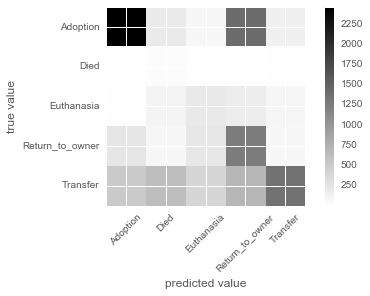

In [184]:
def plot_confusion_matrix(target_test, target_predicted_proba, classes):
    plt.imshow(confusion_matrix(target_test, target_predicted_proba),
               cmap=plt.cm.binary, interpolation='nearest')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.tight_layout()
    plt.xlabel('predicted value')
    plt.ylabel('true value')

    

plot_confusion_matrix(test_y, y_pred, model.classes_ )

In [185]:
train_df.OutcomeType.value_counts()

Adoption           10769
Transfer            9043
Return_to_owner     4780
Euthanasia          1546
Died                 175
Name: OutcomeType, dtype: int64

In [186]:
model.classes_

array(['Adoption', 'Died', 'Euthanasia', 'Return_to_owner', 'Transfer'], dtype=object)

In [187]:
from sklearn.metrics import confusion_matrix, classification_report

In [188]:
print classification_report(test_y, y_pred)

             precision    recall  f1-score   support

   Adoption       0.76      0.57      0.65      4320
       Died       0.03      0.50      0.06        64
 Euthanasia       0.23      0.35      0.28       628
Return_to_owner       0.35      0.66      0.46      1906
   Transfer       0.80      0.37      0.51      3608

avg / total       0.66      0.51      0.54     10526



#### Based off my confusion matrix, I can see that I have the best chance correctly predicting adoption and transfer outcomes.  This makes sense, since most of my data is for these 2 outcomes.

## Machine Learning III

#### Now that I know what outcomes I can better predict, I wanted to see which features play the most importance on predicting a correct outcome.

/Users/EricBGLiao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


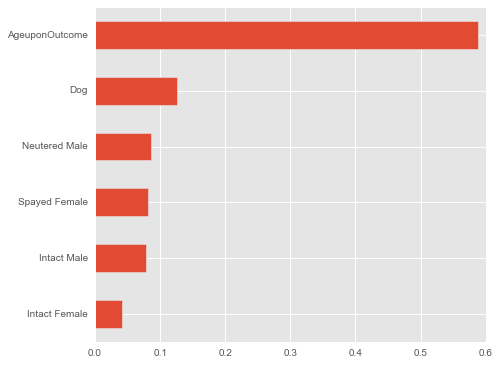

In [247]:
feature_importances = pd.Series(model.feature_importances_, index=train_X.columns)
feature_importances.sort()
feature_importances.plot(kind='barh',figsize=(7,6))

#### My findings show that Age plays the most important outcome.  This coincides with my original hypothesis

## Machine Learning IV

#### What is my true positive rate in predicting the different outcomes?

In [263]:
def plot_roc_curve(target_test, target_predicted_proba):
    fpr, tpr, thresholds = roc_curve(target_test, target_predicted_proba)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

In [193]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score

In [242]:
TestDummies = pd.get_dummies(test_y)

In [253]:
TestDummies.reset_index(drop=True).ix[:,0]

0        0.0
1        1.0
2        1.0
3        0.0
4        0.0
        ... 
10521    0.0
10522    1.0
10523    1.0
10524    0.0
10525    0.0
Name: Adoption, dtype: float64

In [201]:
test_y_num = test_y.map({'Adoption':0, 'Died':1, 'Euthanasia':2, 'Return_to_owner':3, 'Transfer':4})


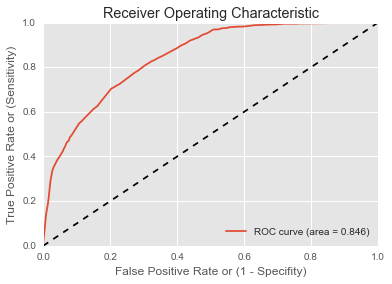

In [264]:
plot_roc_curve(TestDummies.reset_index(drop=True).ix[:,0], y_pred_proba[:,0])

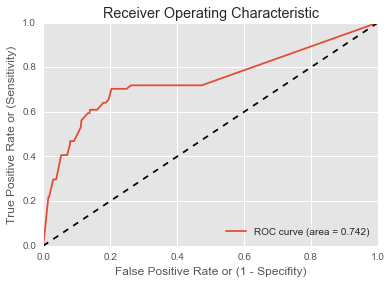

In [265]:
plot_roc_curve(TestDummies.reset_index(drop=True).ix[:,1], y_pred_proba[:,1])

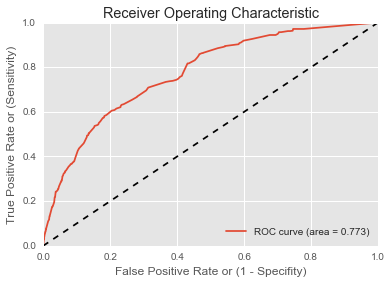

In [266]:
plot_roc_curve(TestDummies.reset_index(drop=True).ix[:,2], y_pred_proba[:,2])

In [232]:
len(y_pred_proba)

10526

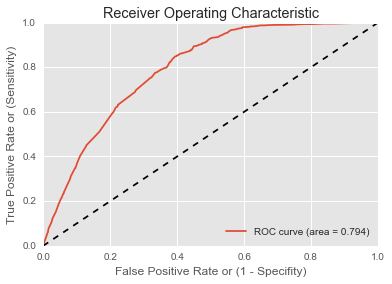

In [267]:
plot_roc_curve(TestDummies.reset_index(drop=True).ix[:,3], y_pred_proba[:,3])

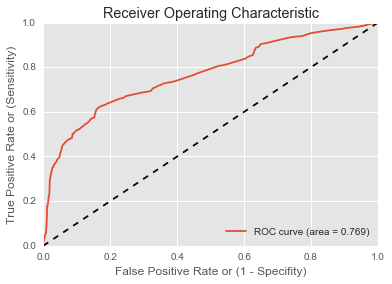

In [268]:
plot_roc_curve(TestDummies.reset_index(drop=True).ix[:,4], y_pred_proba[:,4])

#### I found that I had the highest true positive rates when predicting the following outcomes: Adoption, Died, & Euthanasia. 

## Next Steps

#### - Acquire more data.
#### - Re-run my models to include cats.
#### - Look into the importance of other features for correctly predicting outcome.